In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.options.mode.chained_assignment = None


In [2]:
from prophet import Prophet

In [36]:
df=pd.read_csv("wiki_machine_learning.csv", sep=" ")
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


In [23]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [24]:
df["date"].min()

'2015-01-01'

In [25]:
df["date"].max()

'2016-01-20'

In [38]:
df=df[['date','count']]
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [39]:
df=df.sort_values(by=['date'],ascending=True)
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [40]:
df["date"]

81     2015-01-01
80     2015-01-02
79     2015-01-03
78     2015-01-04
77     2015-01-05
          ...    
382    2016-01-16
381    2016-01-17
376    2016-01-18
375    2016-01-19
372    2016-01-20
Name: date, Length: 384, dtype: object

In [41]:
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [42]:
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [43]:
df[df["count"]==0]

,date,count
104,2015-02-05,0


In [44]:
df=df[df["count"]!=0]

In [45]:
df

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [46]:
df = df.rename(columns={'date': 'ds', 'count': 'y'})
df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [47]:
df = df.groupby('ds')['y'].sum().reset_index()
df

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


## Time-series modeling with FacebookProphet


In [50]:
model = Prophet(interval_width=0.8)
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future_data = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future_data)

<Figure size 1800x1080 with 0 Axes>

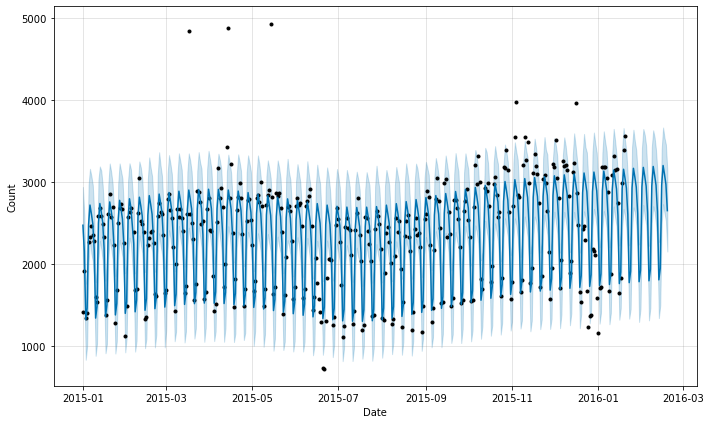

In [52]:
plt.figure(figsize=(25, 15))
model.plot(forecast, xlabel = 'Date', ylabel = 'Count');

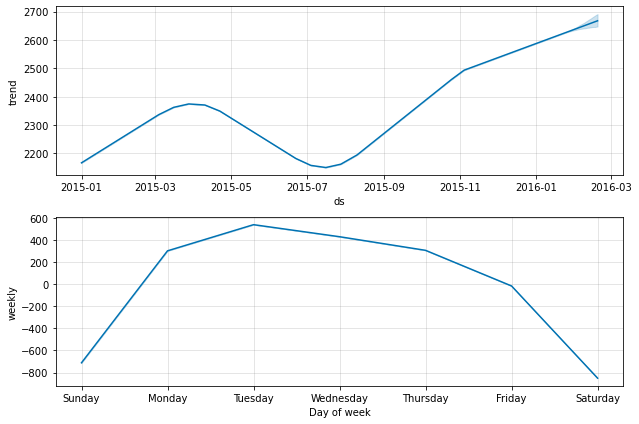

In [53]:
forecasts_plot = model.plot_components(forecast)

## Time-series modeling with NeuralProphet


In [61]:
from neuralprophet import NeuralProphet
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [72]:
metrics = model.fit(df, validate_each_epoch=True, freq="D") 
future = model.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 
forecast = model.predict(future)

Epoch[40/40]: 100%|█| 40/40 [00:02<00:00, 14.96it/s, SmoothL1Loss=0.00642, MAE=191, RegLoss=0, MAE_val=470, SmoothL1Los


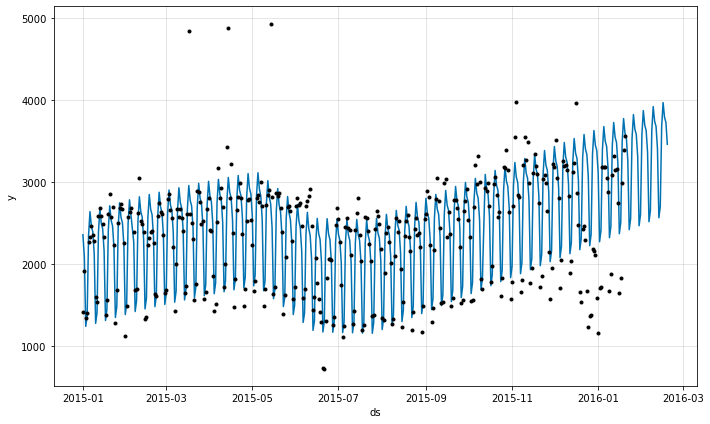

In [73]:
forecasts_plot = model.plot(forecast)


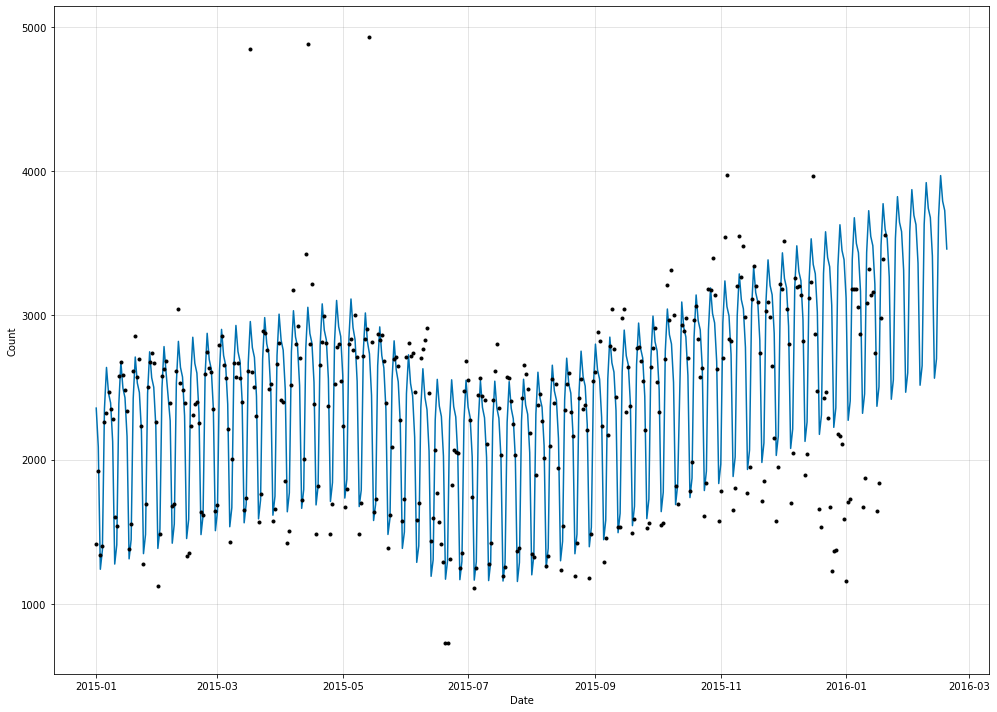

In [74]:
#plotting predictions
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Count", ax=ax);

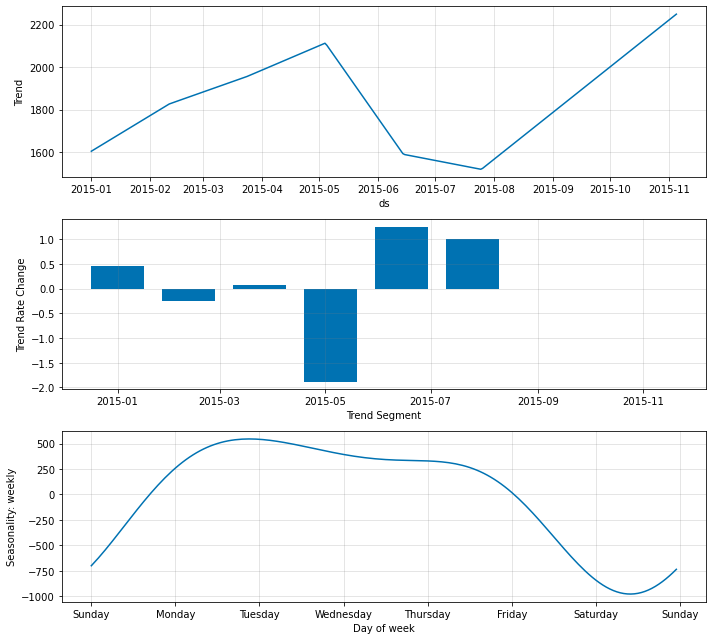

In [71]:
model.plot_parameters();